This is a Julian fork of the 12 steps to Navier-Stokes (Python) [https://github.com/barbagroup/CFDPython] by Lorena A. Barba, Gilbert F. Forsyth . All content of that work is under Creative Commons Attribution CC-BY 4.0, and all python code is under BSD-3 clause. This work also derives from similar forks by Cysor [https://github.com/Cysor/CFDJulia] and by Wallace-dyfq [https://github.com/Wallace-dyfq/CFD-Julia-12-steps--o-Navier-Stokes-Equations]

Step 6: 2-D Convection
----
***

Now we solve 2D Convection, represented by the pair of coupled partial differential equations below:  

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

Discretizing these equations using the methods we've applied previously yields:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

Rearranging both equations, we solve for $u_{i,j}^{n+1}$ and $v_{i,j}^{n+1}$, respectively.  Note that these equations are also coupled.  

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j}^n \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j}^n \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

### Initial Conditions

The initial conditions are the same that we used for 1D convection, applied in both the x and y directions.  

$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{for } x,y \in (0.5, 1)\times(0.5,1) \cr
1 & \text{everywhere else}
\end{matrix}\end{cases}$$

### Boundary Conditions

The boundary conditions hold u and v equal to 1 along the boundaries of the grid
.

$$u = 1,\ v = 1 \text{ for } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$

In [1]:
using Plots

nx = 101
ny = 101
nt = 80
    
c  = 1.0
    
Δx = 2.0 / (nx - 1)
Δy = 2.0 / (ny - 1)
    
σ  = 0.2
Δt = σ * Δx

x = range(0.0, stop=2.0, length=nx)
y = range(0.0, stop=2.0, length=ny)

u₀ = ones(ny, nx)
v₀ = ones(ny, nx)

u₀[0.5 .≤ y .≤ 1 , 0.5 .≤ x .≤ 1] .= 2.0
v₀[0.5 .≤ y .≤ 1 , 0.5 .≤ x .≤ 1] .= 2.0

uⁿ⁺¹ = u₀
vⁿ⁺¹ = v₀

row, col = size(u₀)
    
uⁿ = zeros(row,col);  # pre-allocate to speed up!!!
vⁿ = zeros(row,col);  # pre-allocate to speed up!!!


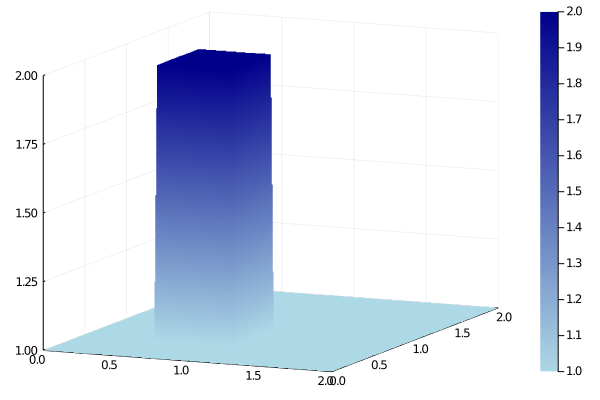

In [2]:
su = surface(x,y,uⁿ⁺¹,c=:blues)

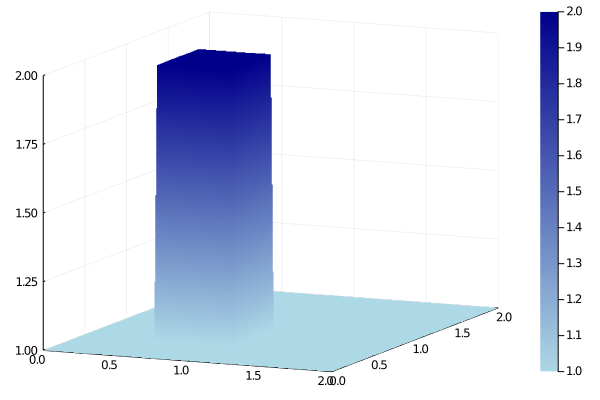

In [3]:
sv = surface(x,y,vⁿ⁺¹,c=:blues)

In [4]:
for n in 1:nt + 1
    
    uⁿ .= uⁿ⁺¹
    vⁿ .= vⁿ⁺¹
        
    for j in 1:row
        for i in 1:col
            if j == 1
                uⁿ⁺¹[j, i] = 1.0
                vⁿ⁺¹[j, i] = 1.0
            elseif j == row
                uⁿ⁺¹[j, i] = 1.0
                vⁿ⁺¹[j, i] = 1.0
            elseif i == col
                uⁿ⁺¹[j, i] = 1.0
                vⁿ⁺¹[j, i] = 1.0
            elseif i == 1
                uⁿ⁺¹[j, i] = 1.0
                vⁿ⁺¹[j, i] = 1.0
            else
                uⁿ⁺¹[j, i] = (uⁿ[j, i] - 
                            (uⁿ[j, i]*Δt/Δx * (uⁿ[j, i] - uⁿ[j, i - 1])) - 
                            (vⁿ[j, i]*Δt/Δy * (uⁿ[j, i] - uⁿ[j - 1, i])))
                
                vⁿ⁺¹[j, i] = (vⁿ[j, i] - 
                            (uⁿ[j, i]*Δt/Δx * (vⁿ[j, i] - vⁿ[j, i - 1])) - 
                            (vⁿ[j, i]*Δt/Δy * (vⁿ[j, i] - vⁿ[j - 1, i])))
            end
        end
    end
        
end



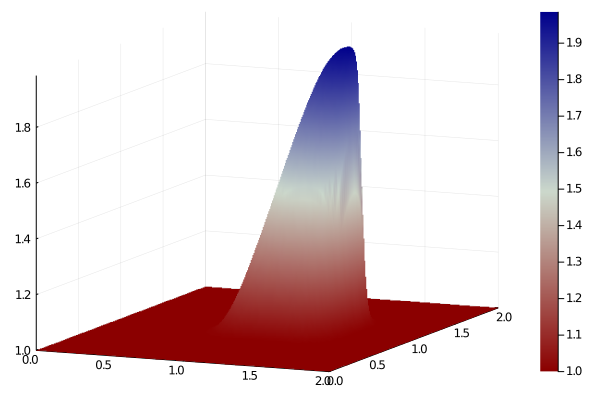

In [5]:
plot(x,y,uⁿ⁺¹,st=:surface,c=:redsblues)

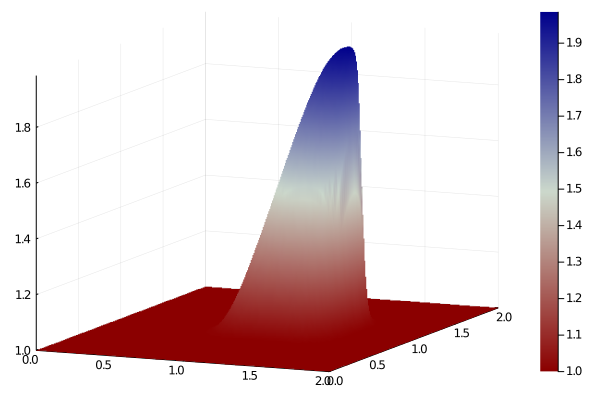

In [6]:
plot(x,y,vⁿ⁺¹,st=:surface,c=:redsblues)